## Main steps

- load a song from data/Album-name/song-name
- (optional, but helpful for final step) play the song 
    - see notebooks/segmentation/#F - Chroma.ipynb
- (optional, but helpful for final step) visualize the mel spectrogram of a section of the song
    - see notebooks/segmentation/#D - Librosa.ipynb
- select a segment with one, two, or three voices that has no changes of pitch, and save it to 
    - data/Album-name/song-name-dir/startoffset-endoffset.wav

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import soundfile
from scipy import signal
from scipy.io import wavfile
import scipy.fft
import IPython.display
import os

data_dir = '/Akamai/voice/data/'

def generate_stable_pitches (start, end, file_name, write_path):
    global data_dir
    
    # check whether the write_path exists
    if (not os.path.isdir(data_dir + write_path)):
        os.mkdir(data_dir + write_path)

    duration = end-start
    # first identify sr recognized by soundfile
    _, sr = soundfile.read(data_dir + file_name)
    print("sr: " + str(sr))

    # load and write
    y, _ = librosa.load(data_dir + file_name, sr=sr, mono=True, offset=start, duration=duration)
    frames = int(duration) * sr 

    ysf, _ = soundfile.read(data_dir + file_name, start=int(start) * sr, frames=frames)
    file = f"{data_dir + write_path}{start}-{end}.wav"
    soundfile.write(file, ysf, sr)

    
def display_spectogram (file_name):
    global data_dir
    
    x, sr = librosa.load(data_dir + file_name)
    X = librosa.stft(x)
    Xdb = np.abs(librosa.amplitude_to_db(X, ref=np.max))
#     plt.figure(figsize=(14, 5))
    librosa.display.specshow(Xdb, x_axis='time', y_axis='mel', sr=sr, fmax=8000)

done!


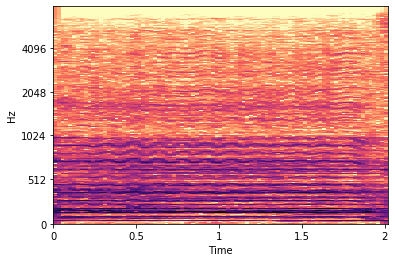

In [7]:
data_dir = '/Akamai/voice/data/'

# all voices have stable pitch
# generate_stable_pitches(4, 6, 'Basiani/01 Mravalzhamier - Table Song, Kakheti.wav', 'Basiani/01 Mravalzhamier/')
# generate_stable_pitches(22, 27, 'Basiani/01 Mravalzhamier - Table Song, Kakheti.wav', 'Basiani/01 Mravalzhamier/')
# generate_stable_pitches(65, 67, 'Basiani/01 Mravalzhamier - Table Song, Kakheti.wav', 'Basiani/01 Mravalzhamier/')
# generate_stable_pitches(22, 23, 'Basiani/02 Elesa - Work Song, Guria.wav', 'Basiani/02 Elesa/')
# generate_stable_pitches(36, 38, 'Basiani/02 Elesa - Work Song, Guria.wav', 'Basiani/02 Elesa/')
# generate_stable_pitches(51, 52, 'Basiani/02 Elesa - Work Song, Guria.wav', 'Basiani/02 Elesa/')
# generate_stable_pitches(22, 23, 'Basiani/02 Elesa - Work Song, Guria.wav', 'Basiani/02 Elesa/')
# generate_stable_pitches(153, 156, 'Basiani/03 Didebata - Circle Dance, Svaneti.wav', 'Basiani/03 Didebata/')
# generate_stable_pitches(118, 122, 'Basiani/05 Vakhtanguri - Table Song, Guria.wav', 'Basiani/05 Vakhtanguri/')
# generate_stable_pitches(138, 141, 'Basiani/06 Mo Lknini Vnaxot - Table Song, Kakheti.wav', 'Basiani/06 Mo Lknini Vnaxot/')
# generate_stable_pitches(269, 272, 'Basiani/06 Mo Lknini Vnaxot - Table Song, Kakheti.wav', 'Basiani/06 Mo Lknini Vnaxot/')
# generate_stable_pitches(64, 67, 'Basiani/07 Khintskala - Traveling Song.wav', 'Basiani/07 Khintskala/')
# generate_stable_pitches(160, 163, 'Basiani/07 Khintskala - Traveling Song.wav', 'Basiani/07 Khintskala/')
# generate_stable_pitches(68, 70, 'Arjit Singh/Sun raha hai tu.wav', 'Arjit Singh/Sun raha hai tu/')
# generate_stable_pitches(75, 77, 'Arjit Singh/Sun raha hai tu.wav', 'Arjit Singh/Sun raha hai tu/')
# generate_stable_pitches(286, 288, 'Arjit Singh/Sun raha hai tu.wav', 'Arjit Singh/Sun raha hai tu/')
# generate_stable_pitches(15, 18, 'Basiani/23 Naduri (Shemokmedura) - Work Song, Guria.wav', 'Basiani/23 Naduri/')
# generate_stable_pitches(90, 92, 'Basiani/23 Naduri (Shemokmedura) - Work Song, Guria.wav', 'Basiani/23 Naduri/')
# generate_stable_pitches(292, 296, 'Basiani/23 Naduri (Shemokmedura) - Work Song, Guria.wav', 'Basiani/23 Naduri/')

# # some voices have stable pitch
# generate_stable_pitches(9, 14, 'Basiani/23 Naduri (Shemokmedura) - Work Song, Guria.wav', 'Basiani/23 Naduri/')
# generate_stable_pitches(26, 31, 'Basiani/23 Naduri (Shemokmedura) - Work Song, Guria.wav', 'Basiani/23 Naduri/')
# generate_stable_pitches(46, 53, 'Basiani/23 Naduri (Shemokmedura) - Work Song, Guria.wav', 'Basiani/23 Naduri/')
# generate_stable_pitches(221, 224, 'Basiani/23 Naduri (Shemokmedura) - Work Song, Guria.wav', 'Basiani/23 Naduri/')
# generate_stable_pitches(10, 30, 'Basiani/22 Chakrulo - The Crown Of Georgian Folk Songs. It Belong To The Family Of Long Kakhetian Table Songs.wav', 'Basiani/22 Chakrulo/')
# generate_stable_pitches(32, 50, 'Basiani/22 Chakrulo - The Crown Of Georgian Folk Songs. It Belong To The Family Of Long Kakhetian Table Songs.wav', 'Basiani/22 Chakrulo/')
# generate_stable_pitches(53, 74, 'Basiani/22 Chakrulo - The Crown Of Georgian Folk Songs. It Belong To The Family Of Long Kakhetian Table Songs.wav', 'Basiani/22 Chakrulo/')
# generate_stable_pitches(91, 106, 'Basiani/22 Chakrulo - The Crown Of Georgian Folk Songs. It Belong To The Family Of Long Kakhetian Table Songs.wav', 'Basiani/22 Chakrulo/')
# generate_stable_pitches(127, 150, 'Basiani/22 Chakrulo - The Crown Of Georgian Folk Songs. It Belong To The Family Of Long Kakhetian Table Songs.wav', 'Basiani/22 Chakrulo/')
# generate_stable_pitches(153, 195, 'Basiani/22 Chakrulo - The Crown Of Georgian Folk Songs. It Belong To The Family Of Long Kakhetian Table Songs.wav', 'Basiani/22 Chakrulo/')

display_spectogram("Basiani/01 Mravalzhamier/65-67.wav")
print("done!")